In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [269]:
df = pd.read_csv("companies.csv")
df

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [270]:
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [271]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [272]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [273]:
#Type your code here!
df.drop(columns=['region','city','state_code'],inplace=True)


#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [274]:
#Type your code here!
df.drop(columns=['id','Unnamed: 0.1','entity_type', 'entity_id','parent_id','created_by','created_at','updated_at' ],inplace=True)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [275]:
#Type your code here!
df.drop(columns=['domain','homepage_url', 'twitter_username','logo_url','logo_width','logo_height','short_description','description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'],inplace=True)


In [276]:
df.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
df.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'ROI'],
      dtype='object')

#### 1.d. Delete duplicate values if found any.

In [278]:
df.duplicated().sum()

87089

In [279]:
# Delete duplicate values if found any.
#Type your code here!
df.drop_duplicates(inplace=True)

In [280]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
#Type your code here!
df.duplicated().sum()

0

In [281]:
# check if any left
#Type your code here!
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
196548    False
196549    False
196550    False
196551    False
196552    False
Length: 109464, dtype: bool

#### 1.e. Delete those which has more than 98% of null values.

In [282]:
Sum = df.isnull().sum()
percentage = (df.isnull().sum() * 100) / len(df)
A_1 = pd.DataFrame({'SUM':Sum , "Percentage" :percentage} , index=df.columns)
A_1['Status'] = A_1['Percentage'].apply(lambda x : 'Drop'if x > 98 else "stay")
A_1

,SUM,Percentage,Status
category_code,12230,11.172623,stay
status,0,0.000000,stay
founded_at,26913,24.586165,stay
closed_at,106845,97.607433,stay
country_code,24870,22.719798,stay
first_investment_at,107217,97.947270,stay
last_investment_at,107217,97.947270,stay
investment_rounds,107213,97.943616,stay
first_funding_at,77992,71.248995,stay
last_funding_at,77992,71.248995,stay


In [283]:
# # Since we can see only nan values so et's check how much of ros has nan values.
#Type your code here!
Columns_With_More_Than_98_OfNull = list(A_1[A_1['Status']== 'Drop'].index)
Columns_With_More_Than_98_OfNull

['ROI']

In [284]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
df.drop(Columns_With_More_Than_98_OfNull , inplace=True,axis=1)


In [285]:
print('Number of rows : {}\nNumber of Columns :{}'.format(df.shape[0],df.shape[1]))

Number of rows : 109464
Number of Columns :18


#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [286]:
#Type your code here!
df[['status','country_code','founded_at','category_code']].dropna( axis='columns' ,inplace=True)

In [287]:
# Since we can see only nan values so et's check how much of rows has nan values.
Sum = df.isnull().sum()
percentage = (df.isnull().sum() * 100) / len(df)
A_2 = pd.DataFrame({'SUM':Sum , "Percentage" :percentage} , index=df.columns)
A_2

,SUM,Percentage
category_code,12230,11.172623
status,0,0.000000
founded_at,26913,24.586165
closed_at,106845,97.607433
country_code,24870,22.719798
first_investment_at,107217,97.947270
last_investment_at,107217,97.947270
investment_rounds,107213,97.943616
first_funding_at,77992,71.248995
last_funding_at,77992,71.248995


In [288]:
df

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [289]:
df[['funding_total_usd','funding_rounds']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109464 entries, 0 to 196552
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funding_total_usd  27862 non-null  float64
 1   funding_rounds     31671 non-null  float64
dtypes: float64(2)
memory usage: 2.5 MB


In [290]:
df[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,2.786200e+04,31671.000000
mean,1.482285e+07,1.660510
std,6.777327e+07,1.202143
min,2.910000e+02,1.000000
25%,5.000000e+05,1.000000
50%,2.569860e+06,1.000000
75%,1.100000e+07,2.000000
max,5.700000e+09,15.000000


<AxesSubplot:xlabel='funding_rounds'>

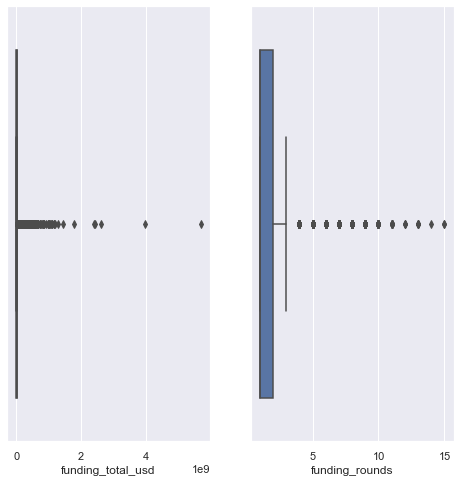

In [291]:
# Detect Outliers with  visualization :
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
sns.boxplot(data=df  ,x='funding_total_usd' ,ax=ax1)
sns.boxplot(data=df  ,x='funding_rounds' , ax=ax2)


### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [292]:
# Function calculate Q1,Q3,IQR
def iqr(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = np.subtract(Q3,Q1)
    return Q1,Q3,IQR
Q1_total , Q3_total , IQR_total = iqr(data=df,col='funding_total_usd')
Q1_rounds , Q3_rounds , IQR_rounds =iqr(data=df,col='funding_rounds')

total_usd = pd.DataFrame({'IQR':IQR_total , 'Q1':Q1_total , 'Q3':Q3_total},index=[0])
rounds = pd.DataFrame({'IQR':IQR_rounds , 'Q1':Q1_rounds , 'Q3':Q3_rounds},index=[1])

Result = pd.concat([total_usd,rounds] , axis='rows')
Result

,IQR,Q1,Q3
0,10500000.0,500000.0,11000000.0
1,1.0,1.0,2.0


#### 2.b.1. Find the Upper and Lower limit

- Lower limit = Q1 - 1.5 * IQR

- Upper limit = Q3 +1.5 * IQR

In [293]:
def UpLower(Q1,Q3,IQR):
    upper = Q1 - (1.5 * IQR)
    lower = Q3 + (1.5*IQR)
    return upper , lower
# For funding_total_usd
up_total , lower_total = UpLower(Q1_total , Q3_total , IQR_total) 
# For funding_rounds
up_rounds , lower_rounds = UpLower(Q1_rounds , Q3_rounds , IQR_rounds)

Result['Upper'] = [up_total,up_rounds]
Result['Lower'] = [lower_total,lower_rounds]
Result

,IQR,Q1,Q3,Upper,Lower
0,10500000.0,500000.0,11000000.0,-15250000.0,26750000.0
1,1.0,1.0,2.0,-0.5,3.5


#### 2.b.1.  Find outliers

In [294]:
# For funding_total_usd is : 
#Type your code here!
outlier_total = df[(df['funding_total_usd'] > up_total) | (df['funding_total_usd'] < lower_total)]
# For funding_rounds
#Type your code here!
outlier_rounds = df[(df['funding_rounds'] > up_rounds) | (df['funding_rounds'] < lower_rounds)]
# For funding_rounds

In [295]:
outlier_total_list = list(outlier_total.index)
outlier_rounds_list = list(outlier_rounds.index)

Unique_rows = list(set(outlier_total_list + outlier_rounds_list))

#### 2.b.1. Drop the outliers

In [296]:
df = df[(df['funding_total_usd'] > up_total) | (df['funding_total_usd'] < lower_total)] 
df = df[(df['funding_rounds'] > up_rounds) | (df['funding_rounds'] < lower_rounds)]

In [297]:
df

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
19,health,operating,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-10-10,2013-08-13,5.0,68069200.0,NaN,NaN,NaN,14.0,37.774929,-122.419415
20,cleantech,operating,2003-01-01,NaN,USA,NaN,NaN,NaN,2011-03-08,2012-01-26,3.0,10125293.0,2010-01-01,2010-01-01,1.0,6.0,30.267153,-97.743061
24,analytics,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2013-03-28,3.0,33000000.0,2010-05-18,2013-03-01,3.0,19.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,social,operating,2011-01-11,NaN,CAN,NaN,NaN,NaN,2011-09-06,2011-09-06,1.0,500000.0,2011-01-11,2011-01-11,1.0,2.0,28.805267,-97.003598
196540,games_video,closed,2006-06-01,2012-07-03,USA,NaN,NaN,NaN,2008-03-12,2009-02-01,2.0,1100000.0,2005-11-01,2008-09-10,2.0,4.0,37.774929,-122.419415
196547,advertising,operating,2008-09-01,NaN,NaN,NaN,NaN,NaN,2007-01-01,2008-05-01,2.0,500000.0,2009-08-27,2009-08-27,1.0,2.0,NaN,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329


#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [298]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on. 



# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [299]:
df['founded_at']

0         2005-10-17
13        2007-10-01
19        2007-10-01
20        2003-01-01
24        2006-01-01
             ...    
196537    2011-01-11
196540    2006-06-01
196547    2008-09-01
196549    2007-11-01
196552    2007-09-01
Name: founded_at, Length: 27862, dtype: object

In [300]:
# For founded_at
#Type your code here!
df['founded_at'] = pd.to_datetime(df['founded_at'] , format='%Y-%m-%d')
df['founded_at'] = df['founded_at'].dt.year


In [301]:
# closed_at
#Type your code here!
df['closed_at'] = pd.to_datetime(df['closed_at'] , format='%Y-%m-%d' , errors='coerce')
df['closed_at'] = df['closed_at'].dt.year

# # first_funding_at
#Type your code here!
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'] , format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = df['first_funding_at'].dt.year

# # last_funding_at
#Type your code here!
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'] , format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = df['last_funding_at'].dt.year

# # first_milestone_at
#Type your code here!
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at'] , format='%Y-%m-%d', errors='coerce')
df['first_milestone_at'] = df['first_milestone_at'].dt.year

# # last_milestone_at
#Type your code here!
df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at'] , format='%Y-%m-%d', errors='coerce')
df['last_milestone_at'] = df['last_milestone_at'].dt.year


In [302]:
df

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005.0,NaN,USA,NaN,NaN,NaN,2005.0,2008.0,3.0,39750000.0,2010.0,2013.0,5.0,17.0,47.606209,-122.332071
13,web,acquired,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
19,health,operating,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2013.0,5.0,68069200.0,NaN,NaN,NaN,14.0,37.774929,-122.419415
20,cleantech,operating,2003.0,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061
24,analytics,operating,2006.0,NaN,USA,NaN,NaN,NaN,2008.0,2013.0,3.0,33000000.0,2010.0,2013.0,3.0,19.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,social,operating,2011.0,NaN,CAN,NaN,NaN,NaN,2011.0,2011.0,1.0,500000.0,2011.0,2011.0,1.0,2.0,28.805267,-97.003598
196540,games_video,closed,2006.0,2012.0,USA,NaN,NaN,NaN,2008.0,2009.0,2.0,1100000.0,2005.0,2008.0,2.0,4.0,37.774929,-122.419415
196547,advertising,operating,2008.0,NaN,NaN,NaN,NaN,NaN,2007.0,2008.0,2.0,500000.0,2009.0,2009.0,1.0,2.0,NaN,NaN
196549,public_relations,operating,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,37.338208,-121.886329


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [303]:
# 1. category_code
#Type your code here!
len(df['category_code'].value_counts())

42

In [304]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.

list_ofcategory_code = df['category_code'].value_counts().index[:15]
list_ofcategory_code

Index(['software', 'biotech', 'web', 'mobile', 'enterprise', 'ecommerce',
       'games_video', 'advertising', 'cleantech', 'hardware', 'medical',
       'analytics', 'health', 'social', 'other'],
      dtype='object')

In [305]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

df['category_code'] = df['category_code'].apply(lambda x : x if x in list_ofcategory_code else 'other' )

In [306]:
# Let's check if we've more than 15 columns
len(df['category_code'].value_counts())

15

In [307]:
# One-hot encoding to category_code
df_one_Hot_Encoding = pd.get_dummies(data=df['category_code'] , drop_first=True)
df_one_Hot_Encoding

,analytics,biotech,cleantech,ecommerce,enterprise,games_video,hardware,health,medical,mobile,other,social,software,web
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,0,0,0,0,0,0,0,0,0,0,0,1,0,0
196540,0,0,0,0,0,1,0,0,0,0,0,0,0,0
196547,0,0,0,0,0,0,0,0,0,0,0,0,0,0
196549,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [308]:
# Concatenate category with company dataset
df = pd.concat([df,df_one_Hot_Encoding], axis='columns')
df

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,...,enterprise,games_video,hardware,health,medical,mobile,other,social,software,web
0,web,operating,2005.0,NaN,USA,NaN,NaN,NaN,2005.0,2008.0,...,0,0,0,0,0,0,0,0,0,1
13,web,acquired,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,0,1
19,health,operating,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
20,cleantech,operating,2003.0,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
24,analytics,operating,2006.0,NaN,USA,NaN,NaN,NaN,2008.0,2013.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,social,operating,2011.0,NaN,CAN,NaN,NaN,NaN,2011.0,2011.0,...,0,0,0,0,0,0,0,1,0,0
196540,games_video,closed,2006.0,2012.0,USA,NaN,NaN,NaN,2008.0,2009.0,...,0,1,0,0,0,0,0,0,0,0
196547,advertising,operating,2008.0,NaN,NaN,NaN,NaN,NaN,2007.0,2008.0,...,0,0,0,0,0,0,0,0,0,0
196549,other,operating,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,1,0,0,0


In [309]:
# Since, We've added the encoded categorycategory_code_,axis=1,inplace=Truecolumns, let's delete original category_code
df.drop('category_code',axis=1,inplace=True)

### Let's encode 'country' column now.

In [310]:
df['country_code'].value_counts()

USA    18142
GBR     1676
CAN      853
FRA      626
ISR      467
       ...  
UZB        1
MMR        1
BHR        1
SMR        1
BRB        1
Name: country_code, Length: 116, dtype: int64

In [311]:
# 1. country_code
len(df['country_code'].value_counts())

116

In [312]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

#Type your code here!
list_ofcategory_code = df['country_code'].value_counts().index[:10]
list_ofcategory_code


Index(['USA', 'GBR', 'CAN', 'FRA', 'ISR', 'DEU', 'IND', 'ESP', 'CHN', 'SWE'], dtype='object')

In [313]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.

df['country_code'] = df['country_code'].apply(lambda x : x if x in list_ofcategory_code else 'other' )

In [314]:
len(df['country_code'].value_counts())

11

In [315]:
# One-hot encoding to category_code
#Type your code here!
df_one_Hot_Encoding_country_code = pd.get_dummies(data=df['country_code'] , drop_first=True)
df_one_Hot_Encoding_country_code

,CHN,DEU,ESP,FRA,GBR,IND,ISR,SWE,USA,other
0,0,0,0,0,0,0,0,0,1,0
13,0,0,0,0,0,0,0,0,1,0
19,0,0,0,0,0,0,0,0,1,0
20,0,0,0,0,0,0,0,0,1,0
24,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
196537,0,0,0,0,0,0,0,0,0,0
196540,0,0,0,0,0,0,0,0,1,0
196547,0,0,0,0,0,0,0,0,0,1
196549,0,0,0,0,0,0,0,0,1,0


In [316]:
# Concatenate category with company dataset
#Type your code here!
df = pd.concat([df,df_one_Hot_Encoding_country_code], axis='columns')
df

,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,...,CHN,DEU,ESP,FRA,GBR,IND,ISR,SWE,USA,other
0,operating,2005.0,NaN,USA,NaN,NaN,NaN,2005.0,2008.0,3.0,...,0,0,0,0,0,0,0,0,1,0
13,acquired,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0,0,0,0,0,0,0,0,1,0
19,operating,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2013.0,5.0,...,0,0,0,0,0,0,0,0,1,0
20,operating,2003.0,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,3.0,...,0,0,0,0,0,0,0,0,1,0
24,operating,2006.0,NaN,USA,NaN,NaN,NaN,2008.0,2013.0,3.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,operating,2011.0,NaN,CAN,NaN,NaN,NaN,2011.0,2011.0,1.0,...,0,0,0,0,0,0,0,0,0,0
196540,closed,2006.0,2012.0,USA,NaN,NaN,NaN,2008.0,2009.0,2.0,...,0,0,0,0,0,0,0,0,1,0
196547,operating,2008.0,NaN,other,NaN,NaN,NaN,2007.0,2008.0,2.0,...,0,0,0,0,0,0,0,0,0,1
196549,operating,2007.0,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [317]:
# Since, We've added the encoded country_code , let's delete original category_code
#Type your code here!
df.drop('country_code',axis=1,inplace=True)

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [318]:
#Type your code here!
df['status'].value_counts()

operating    23299
acquired      2335
closed        1748
ipo            480
Name: status, dtype: int64

In [319]:
df['closed_at'].value_counts()

2012.0    560
2013.0    498
2011.0    308
2010.0    169
2009.0    137
2008.0     61
2007.0     16
2006.0      7
2005.0      6
2001.0      3
2003.0      1
1998.0      1
2004.0      1
1997.0      1
2000.0      1
Name: closed_at, dtype: int64

In [320]:
df['isClosed'] = df['status'].apply(lambda x: 1 if x in ['operating','ipo'] else 0)

In [321]:
#Type your code here!
df

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,DEU,ESP,FRA,GBR,IND,ISR,SWE,USA,other,isClosed
0,operating,2005.0,NaN,NaN,NaN,NaN,2005.0,2008.0,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,1
13,acquired,2007.0,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,...,0,0,0,0,0,0,0,1,0,0
19,operating,2007.0,NaN,NaN,NaN,NaN,2008.0,2013.0,5.0,68069200.0,...,0,0,0,0,0,0,0,1,0,1
20,operating,2003.0,NaN,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,...,0,0,0,0,0,0,0,1,0,1
24,operating,2006.0,NaN,NaN,NaN,NaN,2008.0,2013.0,3.0,33000000.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,operating,2011.0,NaN,NaN,NaN,NaN,2011.0,2011.0,1.0,500000.0,...,0,0,0,0,0,0,0,0,0,1
196540,closed,2006.0,2012.0,NaN,NaN,NaN,2008.0,2009.0,2.0,1100000.0,...,0,0,0,0,0,0,0,1,0,0
196547,operating,2008.0,NaN,NaN,NaN,NaN,2007.0,2008.0,2.0,500000.0,...,0,0,0,0,0,0,0,0,1,1
196549,operating,2007.0,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,750000.0,...,0,0,0,0,0,0,0,1,0,1


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [322]:
df['closed_at'] = df['status'].apply(lambda x:2021 if x in ['operating','ipo'] else 0)

##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [323]:
pd.to_numeric(df['founded_at'].values)

array([2005., 2007., 2007., ..., 2008., 2007., 2007.])

In [325]:
df['Age Day'] =(df['closed_at'] - df['founded_at']) *365
df['Age Day']                                      

0           5840.0
13       -732555.0
19          5110.0
20          6570.0
24          5475.0
            ...   
196537      3650.0
196540   -732190.0
196547      4745.0
196549      5110.0
196552      5110.0
Name: Age Day, Length: 27862, dtype: float64

In [326]:
# To Remove Negative number that hasnot meaning 
df['Age Day'] = df['Age Day'].apply(lambda x :0 if x<0 else x)
df['Age Day']

0         5840.0
13           0.0
19        5110.0
20        6570.0
24        5475.0
           ...  
196537    3650.0
196540       0.0
196547    4745.0
196549    5110.0
196552    5110.0
Name: Age Day, Length: 27862, dtype: float64

#### 2.b.iii. Then, delete the closed_at column.

In [327]:
df.drop('closed_at',axis=1,inplace=True)

### Let's work on target variabe now.

<AxesSubplot:xlabel='status', ylabel='count'>

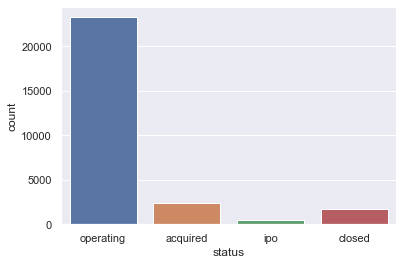

In [328]:
#Type your code here!
sns.countplot(df['status'])

### Remove the null vaues with the mean value in 'Numerical Data'

In [329]:
df

,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,ESP,FRA,GBR,IND,ISR,SWE,USA,other,isClosed,Age Day
0,operating,2005.0,NaN,NaN,NaN,2005.0,2008.0,3.0,39750000.0,2010.0,...,0,0,0,0,0,0,1,0,1,5840.0
13,acquired,2007.0,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,2008.0,...,0,0,0,0,0,0,1,0,0,0.0
19,operating,2007.0,NaN,NaN,NaN,2008.0,2013.0,5.0,68069200.0,NaN,...,0,0,0,0,0,0,1,0,1,5110.0
20,operating,2003.0,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,2010.0,...,0,0,0,0,0,0,1,0,1,6570.0
24,operating,2006.0,NaN,NaN,NaN,2008.0,2013.0,3.0,33000000.0,2010.0,...,0,0,0,0,0,0,1,0,1,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,operating,2011.0,NaN,NaN,NaN,2011.0,2011.0,1.0,500000.0,2011.0,...,0,0,0,0,0,0,0,0,1,3650.0
196540,closed,2006.0,NaN,NaN,NaN,2008.0,2009.0,2.0,1100000.0,2005.0,...,0,0,0,0,0,0,1,0,0,0.0
196547,operating,2008.0,NaN,NaN,NaN,2007.0,2008.0,2.0,500000.0,2009.0,...,0,0,0,0,0,0,0,1,1,4745.0
196549,operating,2007.0,NaN,NaN,NaN,2008.0,2008.0,1.0,750000.0,2013.0,...,0,0,0,0,0,0,1,0,1,5110.0


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27862 entries, 0 to 196552
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               27862 non-null  object 
 1   founded_at           21747 non-null  float64
 2   first_investment_at  239 non-null    object 
 3   last_investment_at   239 non-null    object 
 4   investment_rounds    239 non-null    float64
 5   first_funding_at     27787 non-null  float64
 6   last_funding_at      27787 non-null  float64
 7   funding_rounds       27862 non-null  float64
 8   funding_total_usd    27862 non-null  float64
 9   first_milestone_at   15303 non-null  float64
 10  last_milestone_at    15303 non-null  float64
 11  milestones           15303 non-null  float64
 12  relationships        22558 non-null  float64
 13  lat                  25437 non-null  float64
 14  lng                  25437 non-null  float64
 15  analytics            27862 non-null

In [333]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numerical_Columns = [col for col in df.select_dtypes(include=numerics).columns]
print(f"Count of Numerical_Columns : {len(Numerical_Columns)}")
Numerical_Columns


Count of Numerical_Columns : 14


['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'isClosed',
 'Age Day']

In [334]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='mean')
for col in Numerical_Columns:
    df[col] = imputer.fit_transform(df[[col]])

In [337]:
# First let's check how much of rows has nan values and drop them.
df[Numerical_Columns].isnull().sum()

founded_at            0
investment_rounds     0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
isClosed              0
Age Day               0
dtype: int64

In [335]:
df

,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,ESP,FRA,GBR,IND,ISR,SWE,USA,other,isClosed,Age Day
0,operating,2005.0,NaN,NaN,7.67364,2005.0,2008.0,3.0,39750000.0,2010.000000,...,0,0,0,0,0,0,1,0,1.0,5840.0
13,acquired,2007.0,NaN,NaN,7.67364,2008.0,2008.0,1.0,5000000.0,2008.000000,...,0,0,0,0,0,0,1,0,0.0,0.0
19,operating,2007.0,NaN,NaN,7.67364,2008.0,2013.0,5.0,68069200.0,2010.005097,...,0,0,0,0,0,0,1,0,1.0,5110.0
20,operating,2003.0,NaN,NaN,7.67364,2011.0,2012.0,3.0,10125293.0,2010.000000,...,0,0,0,0,0,0,1,0,1.0,6570.0
24,operating,2006.0,NaN,NaN,7.67364,2008.0,2013.0,3.0,33000000.0,2010.000000,...,0,0,0,0,0,0,1,0,1.0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196537,operating,2011.0,NaN,NaN,7.67364,2011.0,2011.0,1.0,500000.0,2011.000000,...,0,0,0,0,0,0,0,0,1.0,3650.0
196540,closed,2006.0,NaN,NaN,7.67364,2008.0,2009.0,2.0,1100000.0,2005.000000,...,0,0,0,0,0,0,1,0,0.0,0.0
196547,operating,2008.0,NaN,NaN,7.67364,2007.0,2008.0,2.0,500000.0,2009.000000,...,0,0,0,0,0,0,0,1,1.0,4745.0
196549,operating,2007.0,NaN,NaN,7.67364,2008.0,2008.0,1.0,750000.0,2013.000000,...,0,0,0,0,0,0,1,0,1.0,5110.0


In [338]:
df.isnull().sum()

status                     0
founded_at                 0
first_investment_at    27623
last_investment_at     27623
investment_rounds          0
first_funding_at           0
last_funding_at            0
funding_rounds             0
funding_total_usd          0
first_milestone_at         0
last_milestone_at          0
milestones                 0
relationships              0
lat                        0
lng                        0
analytics                  0
biotech                    0
cleantech                  0
ecommerce                  0
enterprise                 0
games_video                0
hardware                   0
health                     0
medical                    0
mobile                     0
other                      0
social                     0
software                   0
web                        0
CHN                        0
DEU                        0
ESP                        0
FRA                        0
GBR                        0
IND           

In [346]:
print(f"The number of null percentage in first_investment_at is : ",((df['first_investment_at'].isnull().sum() )*100)/len(df), "%")
print(f"The number of null percentage in last_investment_at is : ",((df['last_investment_at'].isnull().sum() )*100)/len(df), "%")

The number of null percentage in first_investment_at is :  99.1422008470318 %
The number of null percentage in last_investment_at is :  99.1422008470318 %


In [347]:
#Drop it 
df.drop(['last_investment_at','first_investment_at'],axis=1,inplace=True)

In [348]:
# Final null check on data
df.isnull().sum()

status                0
founded_at            0
investment_rounds     0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
analytics             0
biotech               0
cleantech             0
ecommerce             0
enterprise            0
games_video           0
hardware              0
health                0
medical               0
mobile                0
other                 0
social                0
software              0
web                   0
CHN                   0
DEU                   0
ESP                   0
FRA                   0
GBR                   0
IND                   0
ISR                   0
SWE                   0
USA                   0
other                 0
isClosed              0
Age Day               0
dtype: int64

In [349]:
#Finally Save cleaned Data.
X_train = df.drop('status',axis=1)
X_train.to_csv('Training data.csv',index=False)
df.to_csv("Cleaning data.csv",index=False)